## Title :

Case Study: Covid-19

## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">sklearn.model_selection.GridsearchCV</a>
Exhaustive search over specified parameter values for an estimator.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" target="_blank">sklearn.metrics.confusion_matrix</a>
Compute confusion matrix to evaluate the accuracy of a classification.

<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank">seaborn.heatmap</a>
Plot rectangular data as a color-encoded matrix.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score" target="_blank">sklearn.metrics.roc_auc_score</a>
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc%20curve#sklearn.metrics.roc_curve" target="_blank">sklearn.metrics.roc_curve</a>
Compute Receiver operating characteristic (ROC).

# COVID-19 Machine Learning Dataset®

>Adopted from the dataset provided by Dr. Karandeep Singh [@kdpsinghlab](https://twitter.com/kdpsinghlab/status/1239416911668092928)

The goal of this case study (intended for education) is to **predict the urgency** with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms.

The original dataset is located on this [github repo](https://github.com/ml4lhs/covid19_ml_education/raw/master/covid_ml.csv). Please note that this dataset has been simplified for this case study

The raw data comes from the following [source](http://virological.org/t/epidemiological-data-from-the-ncov-2019-outbreak-early-descriptions-from-publicly-available-data/337).

## Intended For Educational Use Only
## Should this data be used for research?

No. Students working with this dataset should understand that both the source data and the ML data have several limitations:
- The source data is crowdsourced and may contain inaccuracies.
- There may be duplicate patients in this dataset
- There is a substantial amount of missingness in the symptoms data.

## **And most importantly:**
- The entire premise is flawed. The fact that a patient was admitted the same day as experiencing symptoms may have more to do with the availability of hospital beds as opposed to the patient's acuity of illness.
- Also, the fact that less sick patients or asymptomatic patients may not have been captured in the source dataset mean that the probabilities estimated by any model fit on this data are unlikely to reflect reality.

**Primary predictors:**
- age (if an age range was provided in the source data, only the first number is used)
- sex
- cough, fever, chills, sore_throat, headache, fatigue (all derived from the symptoms column using regular expressions)

>The goal of the exercise is to make a classification model to predict the **urgency_of_admission** based on the following criteria
1. 0-1 days from onset of symptoms to admission => High
2. 2+ days from onset of symptoms to admission *or* no admission => Low
  

In [1]:
# Import necessary libraries
# Feel free to import other modules and libraries as you deem fit
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import classification_report,roc_auc_score, roc_curve, accuracy_score

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"


## Calling the dataset
>We are using a modified dataset found here [covid_19 dataset source](https://web.us.edusercontent.com/hulb749ekf8a0pncvj99orb78k)

The following changes were made:
1. Categorical values changed to 1 and 0
2. SMOTE used to upsample in order to balance the dataset. Refer to the class imbalance exercise in the Random Forest session.

In [2]:
# Read the train and test data
# Take a look at the data to understand the features and reponse

# Your code here
train = pd.read_csv("../data/covid_train.csv")
test = pd.read_csv("../data/covid_test.csv")
display(train.head())
test.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30,1,0,0,0,0,0,0,0
1,47,1,0,0,0,0,0,0,0
2,49,1,0,0,0,0,0,0,0
3,50,0,0,0,0,0,0,0,0
4,59,0,0,1,0,0,0,0,0


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,47,0,0,0,0,0,0,0,0
1,42,0,0,1,0,0,0,0,1
2,21,1,0,0,0,0,0,0,1
3,41,1,0,0,0,0,0,0,1
4,43,1,0,1,0,0,0,0,0


In [3]:
# define X_train, y_train, X_test, and y_test 
# Urgency is the response variable, all other variables are the predictors                        

# Your code here
X_train, y_train = train.drop(["Urgency"], axis = 1), train["Urgency"]
X_test, y_test = test.drop(["Urgency"], axis = 1), test["Urgency"]

## GridsearchCV for Logistic Regression
> Perform a hyper-parameter search to get the best C value for Logistic Regression using [GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
>> For simplicity, use **accuracy** as the metric to choose best hyper-parameter


In [4]:
# Perform GridSearchCV to get the best C value for a Logistic Regression model
# Feel free to use the cv and set of C values of your choice
# Remember to keep track of your best C value

# Your code here
# power = np.arange(-6, 10, 1)
# C = np.exp(power)

# power = np.arange(-6.0, 10.0, 1)
# C = np.power(10, power)
# E+01 means moving the decimal point one digit to the right

C = np.arange(0, 2,0.05)
model1 = LogisticRegression(random_state=44)
grid_search1 = GridSearchCV(estimator=model1, param_grid={"C": C}, cv=10, scoring = "accuracy", n_jobs = -1, return_train_score=True).fit(X_train, y_train)
best_c = grid_search1.cv_results_["params"][grid_search1.best_index_]
best_model1 = grid_search1.best_estimator_

/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

### Fitting the data and making predictions


In [5]:
# Using the C value from above, initialize a Logistic Regression model
# Fit the model on the train data
# Predict on the test data

# Your code here
model_new1 = best_model1.fit(X_train, y_train)
pred1 = model_new1.predict(X_test)



In [6]:
# Compute the accuracy of the model
logistic_acc = accuracy_score(y_test, pred1)

## GridsearchCV for KNN classification
> Perform a hyper-parameter search to get the best k value for KNN Classification using [GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
>> For simplicity, use **accuracy** as the metric to choose best hyper-parameter


In [7]:
# Perform GridSearchCV to get the best k value for a kNN Classification model
# Feel free to use the cv and set of k values of your choice
# Remember to keep track of your best k value

# Your code here
k = np.arange(1,50,1)
model2 = KNeighborsClassifier()
grid_search2 = GridSearchCV(estimator=model2, param_grid={"n_neighbors": k}, cv = 10, n_jobs=-1, return_train_score=True).fit(X_train,y_train)
best_k = grid_search2.cv_results_["params"][grid_search2.best_index_]
best_model2 = grid_search2.best_estimator_


### Fitting the data and making predictions


In [8]:
# Using the k value from above, initialize a kNN Classification model
# Fit the model on the train data
# Predict on the test data

# Your code here
model_new2 = best_model2.fit(X_train, y_train)
pred2 = model_new2.predict(X_test)


In [9]:
# Compute the accuracy of the model
knn_acc = accuracy_score(y_test, pred2)


In [10]:
# Store the Confusion Matrix of the trained Logistic Regression Model on the test data in a variable


# Your code here
con1 = confusion_matrix(y_test, pred1)
con1


array([[ 55,  62],
       [ 34, 100]])

In [11]:
# Store the Confusion Matrix of the trained kNN Classification Model on the test data in a variable

# Your code here
con2 = confusion_matrix(y_test, pred2)
con2


array([[72, 45],
       [50, 84]])

## What is a Confusion Matrix?

 A classifier will get some samples right, and some wrong. Generally we see which ones it gets right and which ones it gets wrong on the test set
 
 ![hwimages](images/confusionmatrix.png)
 

### True Positive
- Samples that are +ive and the classifier predicts as +ive are called True Positives (TP)

### False Positive
- Samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP)

### True Negative
- Samples that are -ive and the classifier predicts as -ive are called True Negatives (TN)

### False Negative
- Samples that are +ive and the classifier predicts as -ive are called False Negatives (FN)

### <ins>The boy who cried wolf: Data Science edition</ins>

#### Predicted wolf, but no wolf 

 ![hwimages](images/fp.jpeg)

#### Predicted no wolf, but actually wolf

 ![hwimages](images/fn.jpeg)

### Plot the Confusion Matrix

Plot the Confusion Matrix for each of the above models as a heatmap. Your plot should look similar to the following:

 ![hwimages](images/cm_plot.png)


<Figure size 900x600 with 0 Axes>

<Axes: >

<Figure size 900x600 with 0 Axes>

<Axes: >

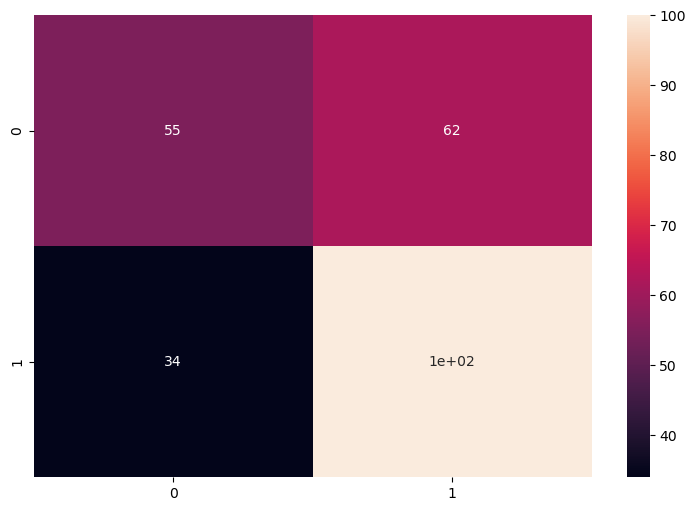

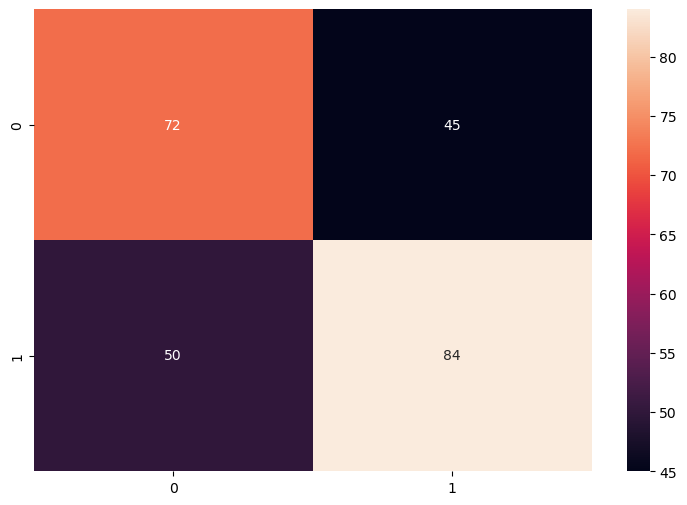

In [12]:
# Plot of the Confusion Matrix for the Logisitic Regression and kNN Classification model

# Your code here
plt.figure(figsize = (9,6))
sns.heatmap(con1, annot=True)

plt.figure(figsize = (9,6))
sns.heatmap(con2, annot = True)

## **Sensitivity**

The **Sensitivity**, also known as **Recall** or **True Positive Rate(TPR)**


$$TPR = Recall = \frac{TP}{OP} = \frac{TP}{TP+FN},$$

also called the **Hit Rate**: the fraction of observed positives (1s) the classifier gets right, or how many true positives were recalled. Maximizing the recall towards 1 means keeping down the false negative rate

In [13]:
# Compute the Sensitivity for the Logistic Regression model
logistic_recall = con1[1][1]/(con1[1][1]+con1[1][0])

# Compute the Sensitivity for the kNN Classification model
knn_recall = con2[1][1]/(con2[1][1]+con2[1][0])


## **Specificity**
The **Specificity** or **True Negative Rate** is defined as

$$TNR = \frac{TN}{ON} = \frac{TN}{FP+TN}$$

In [14]:
# Compute the Specificity for the Logistic Regression model
logistic_fpr = con1[0][0]/(con1[0][0]+con1[0][1])

# Compute the Specificity for the kNN Classification model
knn_fpr = con2[0][0]/(con2[0][0]+con2[0][1])


## **Precision** (Positive Predicted Value)

**Precision**,tells you how many of the predicted positive(1) hits were truly positive

$$Precision = \frac{TP}{PP} = \frac{TP}{TP+FP}.$$

In [15]:
# Compute the Precision for the Logistic Regression model
logistic_precision = con1[1][1]/(con1[1][1]+con1[0][1])

# Compute the Precision for the kNN Classification model
knn_precision = con2[1][1]/(con2[1][1]+con2[0][1])


## **F1 score**
**F1** score gives us the Harmonic Mean of Precision and Recall.
It tries to minimize both **false positives** and **false negatives** simultaneously

$$F1 =  \frac{2*Recall*Precision}{Recall + Precision}$$

In [16]:
# Compute the F1-Score for the Logistic Regression model
logistic_fscore = 2*logistic_recall*logistic_precision/(logistic_recall+logistic_precision)

# Compute the F1-Score for the kNN Classification model
knn_fscore = 2*knn_recall*knn_precision/(knn_recall+knn_precision)


In [17]:
# Helper code to bring everything together
pt = PrettyTable()

pt.field_names = ["Metric", "Logistic Regression", "kNN Classification"]
pt.add_row(["Accuracy", round(logistic_acc, 3), round(knn_acc, 3)])
pt.add_row(["Sensitivity(Recall)", round(logistic_recall, 3), round(knn_recall, 3)])
pt.add_row(["Specificity", round(logistic_fpr, 3), round(knn_fpr, 3)])
pt.add_row(["Precision", round(logistic_precision, 3), round(knn_precision, 3)])
pt.add_row(["F1 Score", round(logistic_fscore, 3), round(knn_fscore, 3)])

print(pt)


+---------------------+---------------------+--------------------+
|        Metric       | Logistic Regression | kNN Classification |
+---------------------+---------------------+--------------------+
|       Accuracy      |        0.618        |       0.622        |
| Sensitivity(Recall) |        0.746        |       0.627        |
|     Specificity     |         0.47        |       0.615        |
|      Precision      |        0.617        |       0.651        |
|       F1 Score      |        0.676        |       0.639        |
+---------------------+---------------------+--------------------+


# BACK TO THE LECTURE

## Bayes Theorem & Diagnostic testing

Refer to Dr. Rahul Dave's [Covid19 Serological testing blog](https://covid19.posts.ai/2020/04/04/bayes-rule-and-serological-testing.html) for an excellent introduction to all the above concepts.

In [18]:
# Compute the area under the ROC curve for the Logistic Regression model
logreg_auc = roc_auc_score(y_test, model_new1.predict_proba(X_test)[:,1])

# Compute the area under the ROC curve for the kNN Classification model
knnreg_auc = roc_auc_score(y_test, model_new2.predict_proba(X_test)[:,1])


## ROC Curve

To make a ROC curve you plot the True Positive Rate, against the False Positive Rate,

The curve is actually a 3 dimensional plot, which each point representing a different value of threshold.

![ROC](images/roc.png)


<Figure size 900x600 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

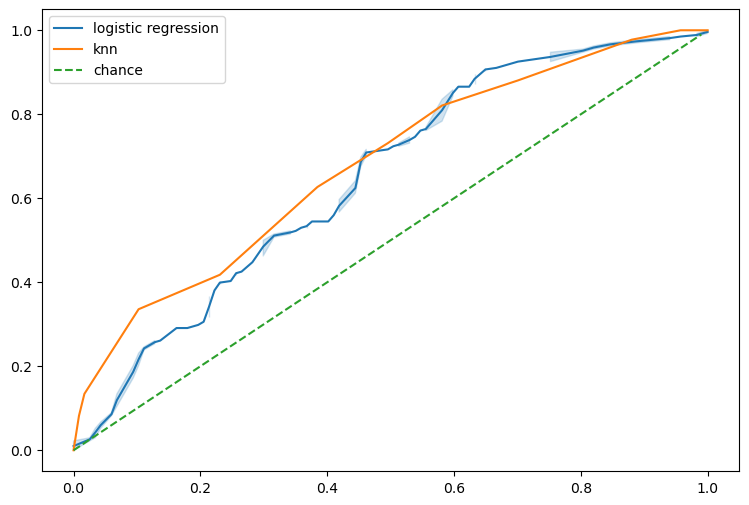

In [19]:
# Plot the ROC curve for the Logistic Regression model and kNN Classification model
# You can refer to the end of homework 5 for example code

# Your code here
xrange = np.arange(0,1,0.01)
fp1, tp1, threshold1 = roc_curve(y_test, model_new1.predict_proba(X_test)[:,1])
fp2, tp2, threshold2 = roc_curve(y_test, model_new2.predict_proba(X_test)[:,1])
plt.figure(figsize=(9,6))
sns.lineplot(x = fp1, y=tp1, label = "logistic regression")
sns.lineplot(x = fp2, y = tp2, label = "knn")
sns.lineplot(x = xrange, y = xrange, linestyle = "--", label = "chance")
plt.legend()

# Which classifier to choose?

## Choice of classifier Scenario 1 - BRAZIL

<img src="images/brazil.png" alt="drawing" width="500"/>

>**The new variant of the Covid-19 virus is contagious and is infecting many Brazilians**

>>*Brazilian officials however dictate that hospitals do not classify a large number of people at 'high' risk to avoid bad press and subsequent political global backlash**

**In numbers we need the best classifier with the following restriction**

$$TPR + FPR \le 0.5$$     


## Choice of classifier Scenario 2 - GERMANY

<img src="images/germany.png" alt="drawing" width="500"/>

>**It's the month of February, and Germany, is now aware that the pandemic of Covid-19 has severely hit Europe. Italy is already decimated and there is suspected spread to other European nations as well**

>> German officials have a clear target. The want the fatality ratio to be as less as possible. Thus, it is imperative to find cases in need of urgent attention and give them the best chance of survival.

**In numbers we need the best classifier with the following restriction**

$$ 0.8 \ge TPR \le 0.85 $$

# Choice of classifier Scenario 3 - INDIA

<img src="images/india.png" alt="drawing" width="500"/>

>**It's the month of May, and India, now severly impacted by Covid-19, has now run a major shortage of hospital beds for suspected cases**

>> Owing to exponentially rising cases Indian officials cannot afford many **False Positives** to be given hospital beds. Hence, it is dictated that hospitals do not classify a large number of people at 'high' risk to avoid bed shortage for **At risk** patients

>> India has only 1 million beds left, and there are already 2 million people suspected of having the disease. The officials need to work out a strategy to find the people at most need of urgent care.

**In numbers we need the best classifier with the following restriction**

$$TP + FP = 1000000$$

$$TP = TPR*OP$$ $$FP = TPR*ON$$

$$TPR*OP + FPR*ON = 1000000$$

$$Assuming\ OP=ON = 500000$$

$$TPR + FPR \le 1 $$

## ROC curve with boundary conditions

Plot the ROC curve of the Logistic Regression model and kNN Classification model, along with the boundary conditions for each of the scenarios.

Each of the scenarios can be represented as a region governed by straight line(s) based on the given conditions. The resulting plot will look similar to the following:

<img src="images/final.png" alt="drawing" width="900"/>


<Figure size 900x600 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 0, 'False positive')

Text(0, 0.5, 'True positive')

Text(0.5, 1.0, 'ROC curve')

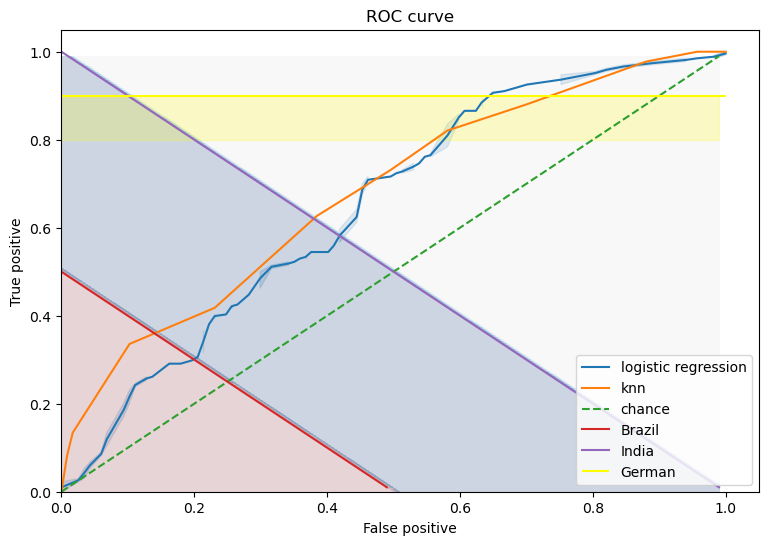

In [64]:
# Area under curve - Logistic regression & kNN
# along with the boundary conditions

# Your code here
xrange = np.arange(0,1,0.01)
fp1, tp1, threshold1 = roc_curve(y_test, model_new1.predict_proba(X_test)[:,1])
fp2, tp2, threshold2 = roc_curve(y_test, model_new2.predict_proba(X_test)[:,1])
plt.figure(figsize=(9,6))
sns.lineplot(x = fp1, y=tp1, label = "logistic regression")
sns.lineplot(x = fp2, y = tp2, label = "knn")
sns.lineplot(x = xrange, y = xrange, linestyle = "--", label = "chance")

x, y = np.arange(0,1,0.01), np.arange(0,1,0.01)
xx, yy = np.meshgrid(x, y)
xx1 = xx.ravel()
yy1 = yy.ravel()
z1 = 1*((xx1 +yy1) <=0.5).reshape(xx.shape)
z2 = 1*(np.bitwise_and((xx1 +yy1)<=1, (xx1+yy1)>0.5)).reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha = 0.2, cmap = "Reds")
plt.plot(np.arange(0,0.5,0.01), -np.arange(0,0.5,0.01)+0.5, label = "Brazil")
plt.contourf(xx, yy, z2, alpha = 0.2, cmap = "Blues")
plt.plot(np.arange(0,1,0.01), -np.arange(0,1,0.01)+1, label = "India")
plt.fill_between(x, 0.8,0.9, alpha = 0.2, color = "yellow")
plt.hlines(0.9, 0, 1, color = "yellow", label = "German")
plt.legend(loc = "lower right")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve")

In [70]:
np.all([[True, True, True], [False, True,True]], where=[[True], [True]])

False

# BACK TO THE LECTURE